In [1]:
import os

from uncoverml import diagnostics

SRC = os.environ.get('UNCOVERML_SRC')
SRC = '/home/ubuntu/uncover-ml' if SRC is None else SRC

# Path to feature ranking scores file.
path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 
                    'precomputed', 'learn', 'sirsam_Na_randomforest_featureranks.json')

feature_ranks_figure = diagnostics.plot_feature_ranks(path)
    

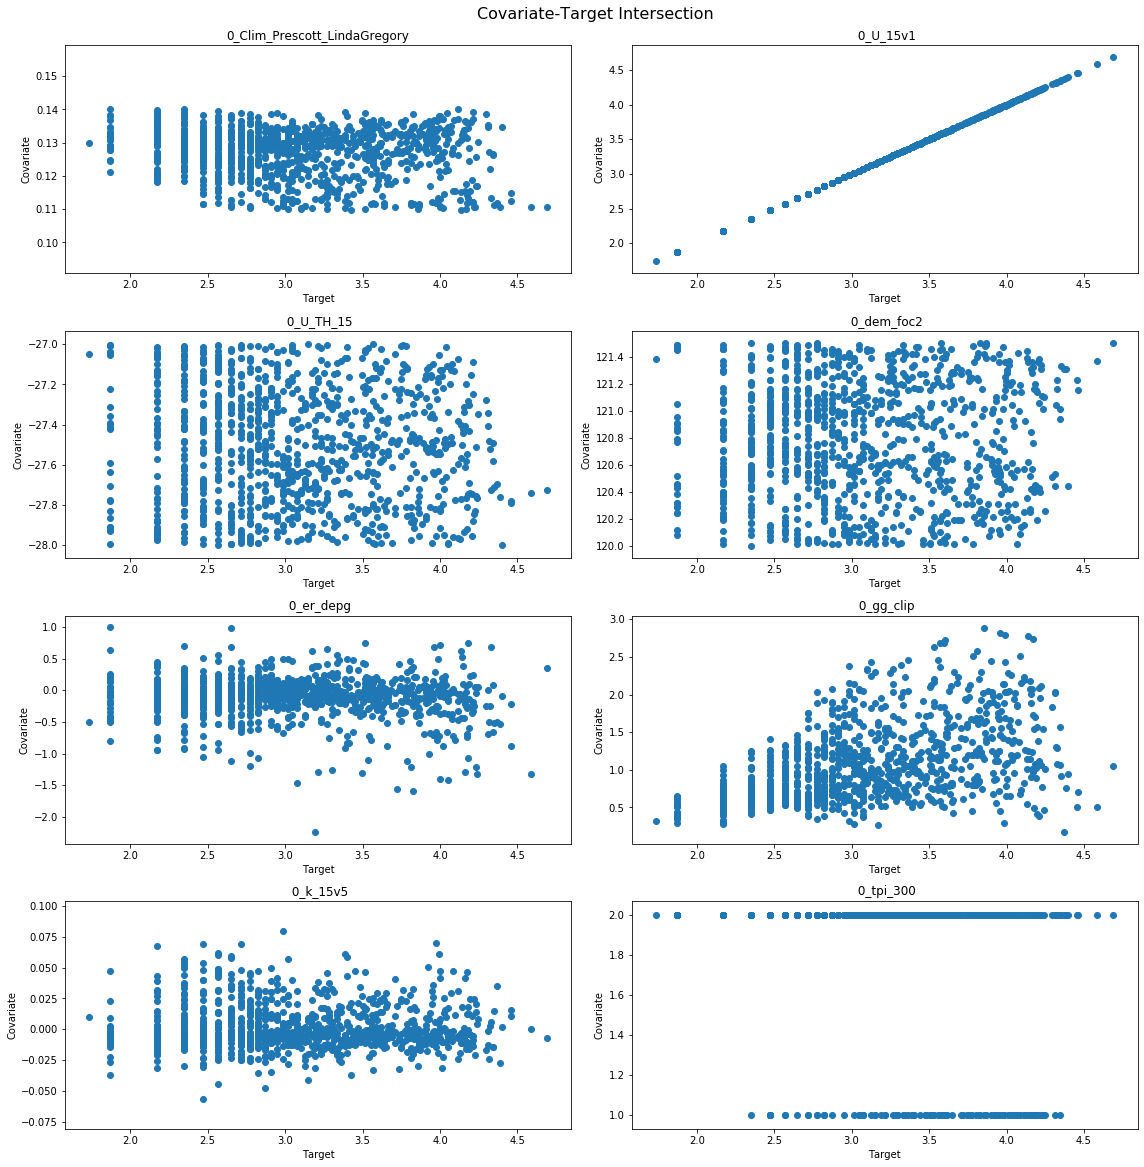

In [2]:
import os

from uncoverml import diagnostics

SRC = os.environ.get('UNCOVERML_SRC')
SRC = '/home/ubuntu/uncover-ml' if SRC is None else SRC

path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

intersection = diagnostics.plot_covariates_x_targets(path, cols=2)
    

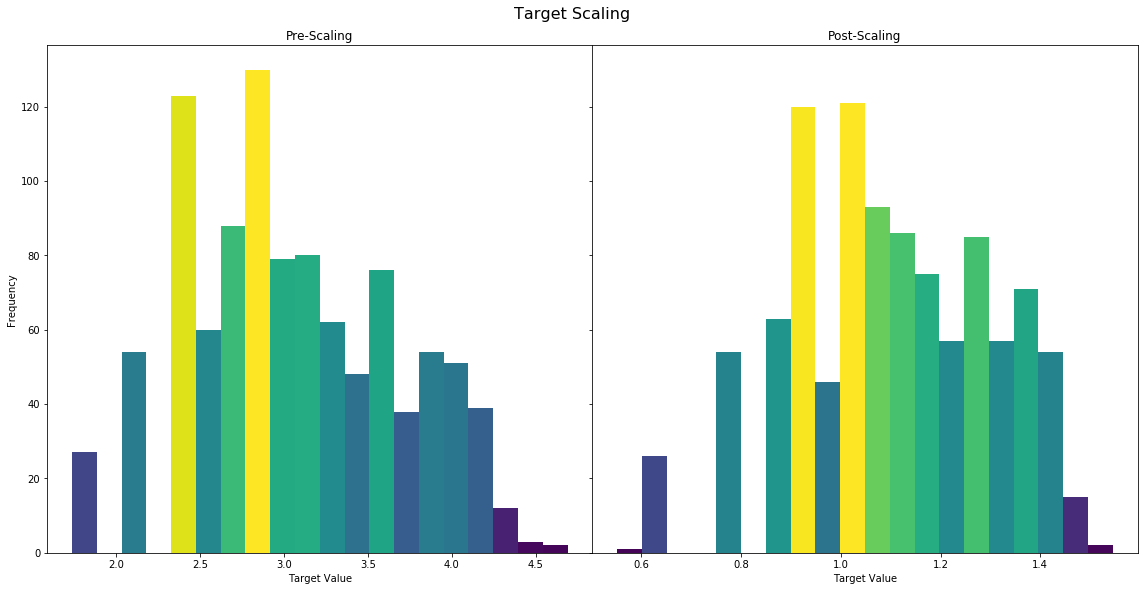

In [3]:
import os

from uncoverml import diagnostics

SRC = os.environ.get('UNCOVERML_SRC')
SRC = '/home/ubuntu/uncover-ml' if SRC is None else SRC

path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'out',
                    'sirsam_Na_randomforest_transformed_targets.csv')

target_histograms = diagnostics.plot_target_scaling(path)


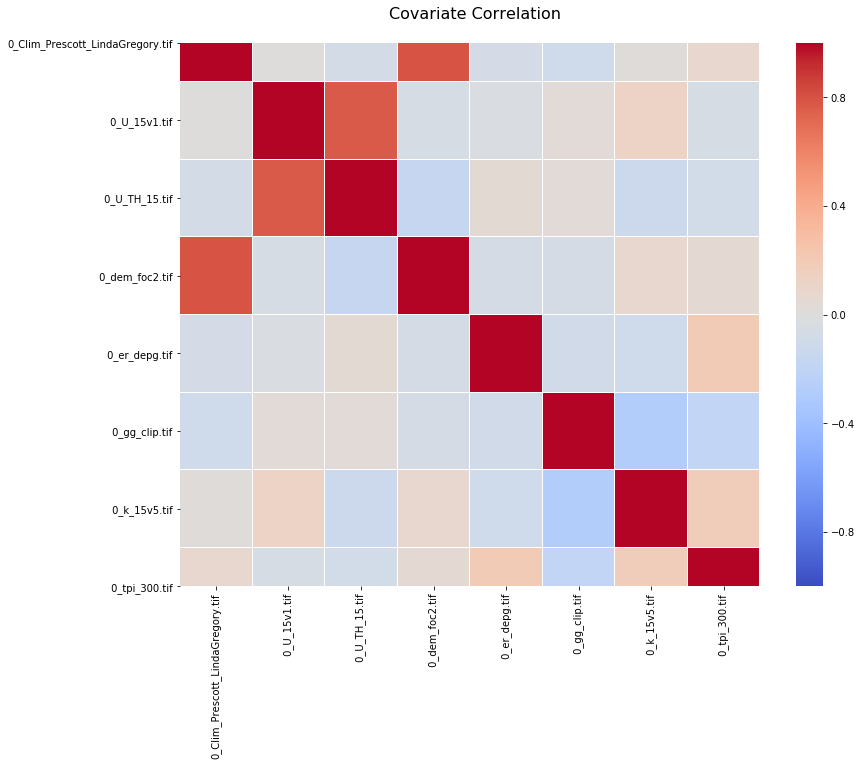

In [4]:
import os
import csv

from uncoverml import diagnostics
    
SRC = os.environ.get('UNCOVERML_SRC')
SRC = '/home/ubuntu/uncover-ml' if SRC is None else SRC

path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'precomputed', 'learn', 'sirsam_Na_randomforest_rawcovariates.csv')

correlation = diagnostics.plot_covariate_correlation(path)


'features' are required even when loading from pickled data - this is a work around for getting image specifications. Needs to be fixed.
/home/ubuntu/venvs/uncoverml-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


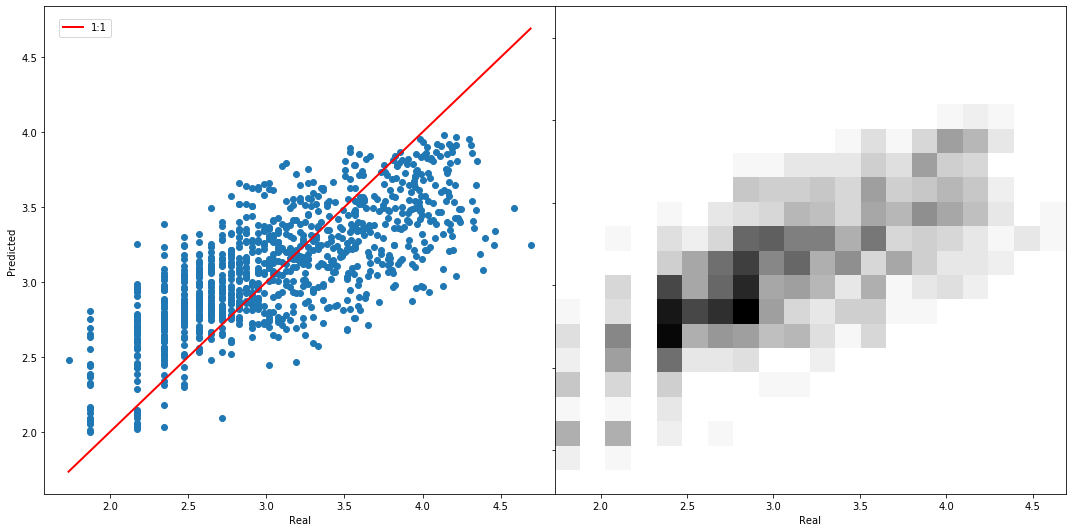

In [42]:
import os

import rasterio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from uncoverml import diagnostics
from uncoverml import patch
from uncoverml import config
from uncoverml import geoio

SRC = os.environ.get('UNCOVERML_SRC')
SRC = '/home/ubuntu/uncover-ml' if SRC is None else SRC
os.environ['UNCOVERML_SRC'] = SRC

cfg_file = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 'sirsam_Na_randomforest.yaml')

path = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest', 
                    'out', 'sirsam_Na_randomforest_prediction.tif')


rcp = os.path.join(SRC, 'tests', 'test_data', 'sirsam', 'random_forest',
                    'out', 'sirsam_Na_randomforest_rawcovariates.csv')

cfg = config.Config(cfg_file)
df = pd.read_csv(rcp)
df.drop(list(df.columns.values)[:-3], axis=1, inplace=True)

targets = geoio.load_targets(cfg.target_file, cfg.target_property)
targets = list(zip(targets.positions, targets.observations))

targets_ar = np.zeros(len(targets))
predict_ar = np.zeros(len(targets))

                    
with rasterio.open(path) as ds:
    ar = ds.read(1)
    for i, (pos, val) in enumerate(targets):
        ind = ds.index(pos[0], pos[1])
        pred = ar[ind]
        targets_ar[i] = val
        predict_ar[i] = pred
        

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7.5), gridspec_kw={'wspace': 0})
for ax in axs:
    ax.set_xlabel('Real')
    ax.set_ylabel('Predicted')
    ax.label_outer()


bin_limits = ([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()])
axs[1].hist2d(targets_ar, predict_ar, bins=20, range=bin_limits, cmap=plt.cm.binary, alpha=1)
    
axs[0].scatter(targets_ar, predict_ar)
axs[0].plot([targets_ar.min(), targets_ar.max()], [targets_ar.min(), targets_ar.max()],
        color='r', linewidth=2, label='1:1')

fig.legend(loc='upper left', bbox_to_anchor=(0.05, 0.96))
fig.tight_layout()
fig.show()

